## Decision Trees, Random Forests, and Neural Network
### Matthew Paz

### Introduction

<p>For this assignment, I am using the Pima Indian Diabetes dataset, which was downloaded from Kaggle. The objective is to predict diabetes diagnosis with multiple machine-learning algorithms. </p>

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Data Preparation

In [4]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [5]:
diabetes = pd.read_csv('Class_Materials/Data/diabetes.csv', header=None, names=col_names, skiprows=9)

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,45,543,30.5,0.158,53,1
1,8,125,96,0,0,0.0,0.232,54,1
2,4,110,92,0,0,37.6,0.191,30,0
3,10,168,74,0,0,38.0,0.537,34,1
4,10,139,80,0,0,27.1,1.441,57,0


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 9 columns):
Pregnancies                 760 non-null int64
Glucose                     760 non-null int64
BloodPressure               760 non-null int64
SkinThickness               760 non-null int64
Insulin                     760 non-null int64
BMI                         760 non-null float64
DiabetesPedigreeFunction    760 non-null float64
Age                         760 non-null int64
Outcome                     760 non-null int64
dtypes: float64(2), int64(7)
memory usage: 53.6 KB


In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.840789,120.915789,69.264474,20.550000,80.178947,32.004868,0.470675,33.259211,0.347368
std,3.369188,31.954526,19.250442,15.958118,115.622094,7.900739,0.325652,11.793119,0.476448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.374500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,128.250000,36.600000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes.shape

(760, 9)

## Exploratory Data Analysis (EDA)

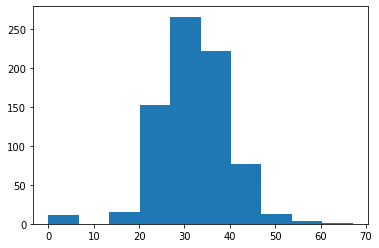

In [11]:
import matplotlib.pyplot as plt

plt.hist(diabetes.BMI)
plt.show()

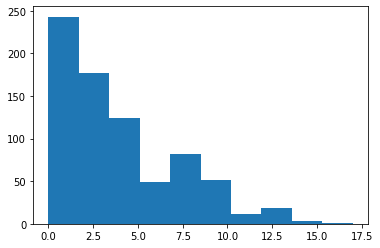

In [12]:
plt.hist(diabetes.Pregnancies)
plt.show()

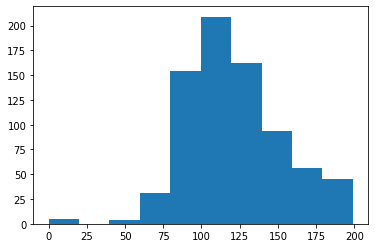

In [13]:
plt.hist(diabetes.Glucose)
plt.show()

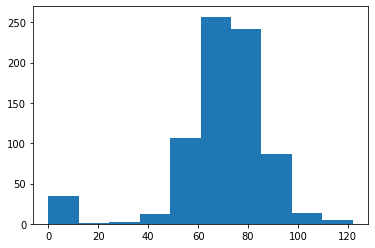

In [14]:
plt.hist(diabetes.BloodPressure)
plt.show()

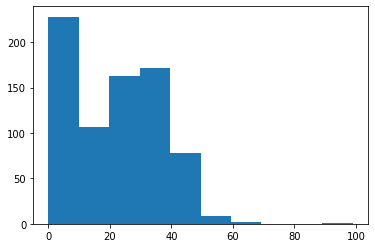

In [15]:
plt.hist(diabetes.SkinThickness)
plt.show()

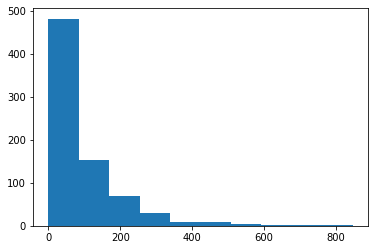

In [16]:
plt.hist(diabetes.Insulin)
plt.show()

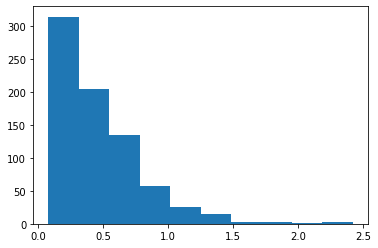

In [17]:
plt.hist(diabetes.DiabetesPedigreeFunction)
plt.show()

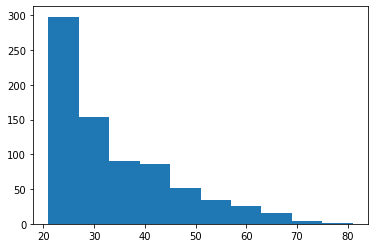

In [18]:
plt.hist(diabetes.Age)
plt.show()

(9.0, 0.0)

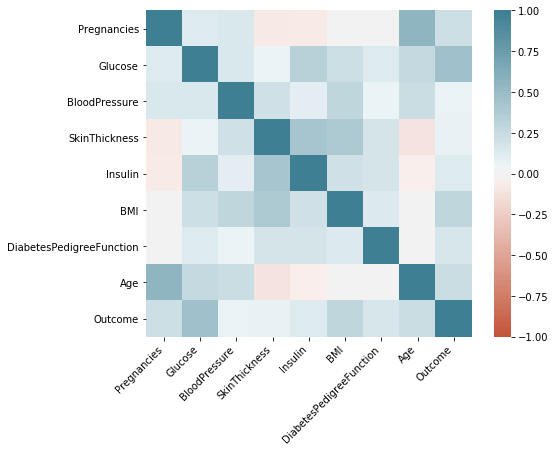

In [25]:
import seaborn as sns

corr = diabetes.corr()

plt.figure(figsize=(8,6))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Decision Trees

In [23]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
diabetes_model = DecisionTreeClassifier()

In [26]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [27]:
!pip3.6 install --user pydotplus

Looking in links: /usr/share/pip-wheels


In [28]:
import pydotplus

In [29]:
parameter_space = {
    'max_depth': [5,10,15,20]
}

In [30]:
# Train Decision Tree Classifer
diabetes_model = diabetes_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = diabetes_model.predict(X_test)

In [31]:
from sklearn.model_selection import GridSearchCV

my_model = GridSearchCV(diabetes_model, # Your Model 
                                    parameter_space, # Your Parameters
                                    cv=10) # Number of Crossfolds

In [32]:
my_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [33]:
print("score :",diabetes_model.score(X_test,y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

score : 0.6789473684210526
Accuracy: 0.6789473684210526


<p> The model accurately predicted a classification rate of 67.89 percent, which is relatively a good score of accuracy. </p>

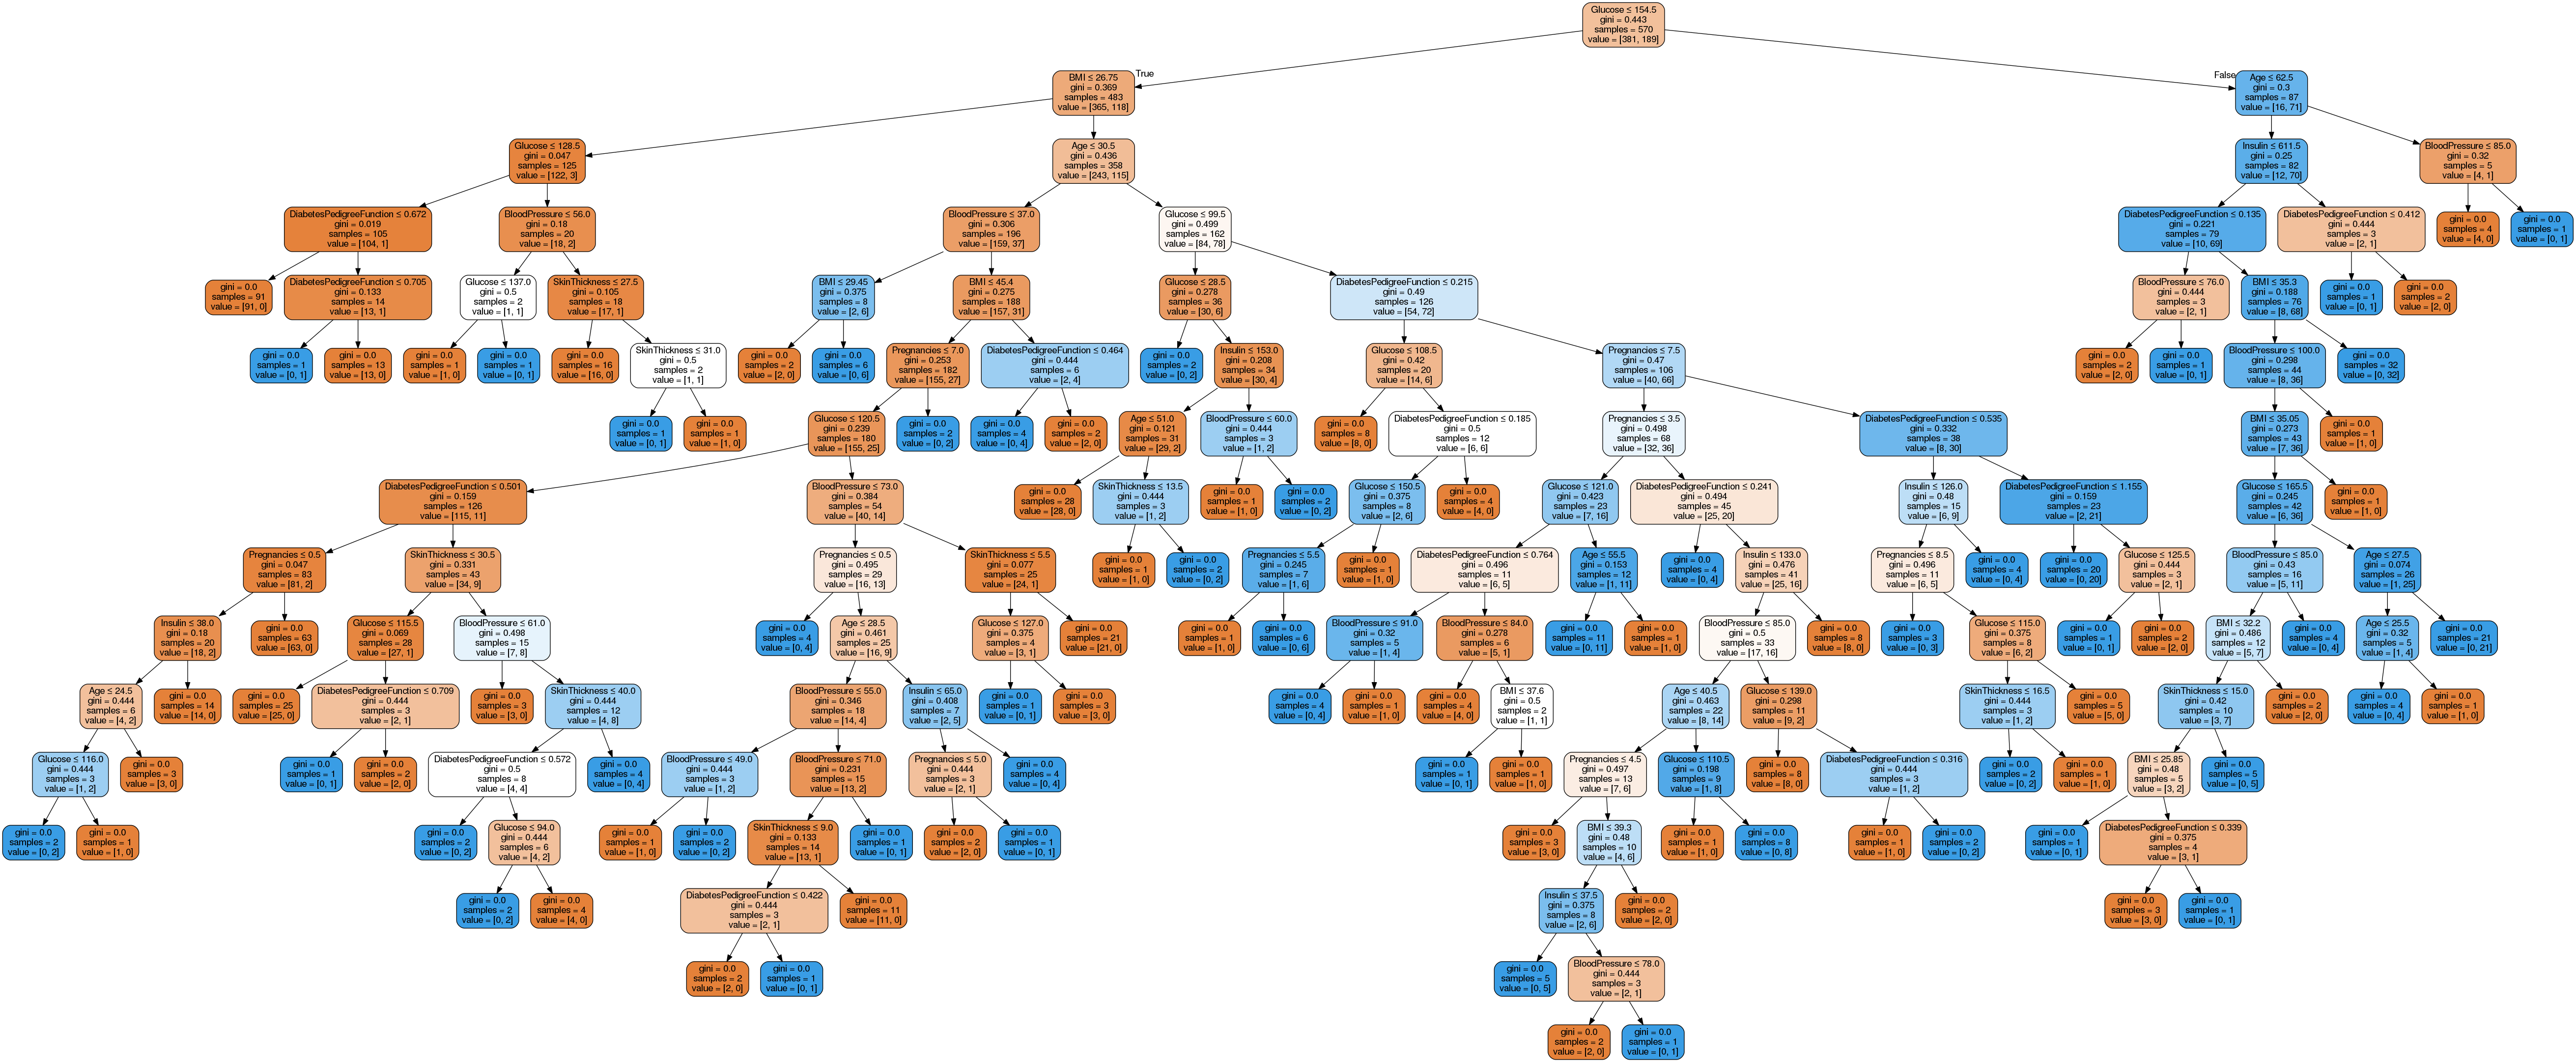

In [34]:
#Tree Visualization
dot_data = StringIO() #This will output your visualization to a PNG file
export_graphviz(diabetes_model, #YOUR DATA GOES HERE
                    out_file=dot_data, 
                    feature_names=X.columns, #YOUR DATA GOES HERE
                    filled=True, 
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) #This will display the PNG saved to your local directory

### Random Forests Classifiers

In [35]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
#Producing a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10, random_state=0)

In [38]:
#Training the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
y_pred=clf.predict(X_test)

In [40]:
my_model_2 = GridSearchCV(clf, # Your Model 
                                    parameter_space, # Your Parameters
                                    cv=10) # Number of Crossfolds

In [42]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7263157894736842


<p> When comparing the first two models, the Random Forest model produce higher score of accuracy, which was 72.63 percent. This model produce a more accurate score compared to the Decision Tree. </p>

### Artificial Neural Networks (ANN)

In [57]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,760.0,3.840789,3.369188,0.000,1.000,3.0000,6.0000,17.00
Glucose,760.0,120.915789,31.954526,0.000,99.000,117.0000,140.2500,199.00
BloodPressure,760.0,69.264474,19.250442,0.000,63.500,72.0000,80.0000,122.00
SkinThickness,760.0,20.550000,15.958118,0.000,0.000,23.0000,32.0000,99.00
Insulin,760.0,80.178947,115.622094,0.000,0.000,34.0000,128.2500,846.00
BMI,760.0,32.004868,7.900739,0.000,27.300,32.0000,36.6000,67.10
DiabetesPedigreeFunction,760.0,0.470675,0.325652,0.078,0.244,0.3745,0.6245,2.42
Age,760.0,33.259211,11.793119,21.000,24.000,29.0000,41.0000,81.00
Outcome,760.0,0.347368,0.476448,0.000,0.000,0.0000,1.0000,1.00


<p> After observing the summary of the diabetes data, the average score, or mean, of the outcome variable, which implies who has or does not have not the diagnosis (0 denotes no diabetes and 1 denotes diabetes), is roughly 35 percent, which, thus, gives us a basline score of roughly 65 percent. With the basline score in mind, I can now compare the model's score with the baseline. </p>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
pd.DataFrame(X_train).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,570.0,5.804324e-17,1.000878,-1.148660,-0.845120,-0.238040,0.672581,3.100904
1,570.0,-1.795591e-17,1.000878,-3.797984,-0.690993,-0.126086,0.595741,2.447381
2,570.0,-1.980385e-16,1.000878,-3.478824,-0.267846,0.133527,0.534899,2.642103
3,570.0,8.316934e-17,1.000878,-1.310636,-1.310636,0.125777,0.732263,2.519799
4,570.0,-1.738376e-17,1.000878,-0.685368,-0.685368,-0.375620,0.384102,6.396992
5,570.0,-3.509863e-16,1.000878,-4.053829,-0.601703,0.022482,0.605267,4.493686
6,570.0,-1.751036e-16,1.000878,-1.202441,-0.713352,-0.275747,0.484017,5.799243
7,570.0,1.503670e-16,1.000878,-1.009259,-0.758192,-0.381592,0.580831,4.012076


In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [50]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
len(mlp.coefs_) 

4

In [52]:
len(mlp.coefs_[0]) 

8

<p> The coefs attribute illustrates a list of the weight matrices. We have four coeffcients, or, in other words, four lists.  There are 8 weights in each list. </p>

In [59]:
predictions = mlp.predict(X_test)
pred_train = mlp.predict(X_train)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(confusion_matrix(y_train,pred_train))
print(classification_report(y_train,pred_train))

[[350  27]
 [ 22 171]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       377
           1       0.86      0.89      0.87       193

    accuracy                           0.91       570
   macro avg       0.90      0.91      0.90       570
weighted avg       0.91      0.91      0.91       570



In [62]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[97 22]
 [29 42]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       119
           1       0.66      0.59      0.62        71

    accuracy                           0.73       190
   macro avg       0.71      0.70      0.71       190
weighted avg       0.73      0.73      0.73       190



<p> The model produced an accuracy score of 73 percent from the test data and an accuracy score of 91 percent from the trained data respectively. With this in mind, we can now compare the scores from both the test and trained data to the accuracy of baseline. If you recall, the baseline score was 66, which was less than both scores from the test and trained data. 

 Fundamentally speaking, the ANN and Random Forest models are different types of algorithms. A random forest model is a collection of decision trees, whereas an ANN is a network of neurons. Both algorithms work optimally with various types of data, respectively. Because of the simplicity of a Random Forest model and the dataset used, I would argue that this particular algorithm was better. </p>